# Practica 2: Teleportación Cuántica y Codificación Superdensa

Guillermo García Patiño Lenza

### Ejercicio 3:

#### Teleportación Cuántica:

In [6]:
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit import (
    QuantumCircuit,
    execute,
    Aer)
from qiskit import IBMQ
from qiskit import IBMQ
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import QasmSimulator

import math

IBMQ.save_account("502ea4e4ac7584bf351accb55ae42a2dab5b8d895056a9ef9065cefde49d014ffd56c64eaa787acb892af1e3b81c329a5dc8a7db973da09bbc7985594e6d226a")
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2021-03-25 12:37:18,709: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-03-25 12:37:19,261: Credentials are already in use. The existing account in the session will be replaced.


In [71]:
def creaCircuitoTelep(transmit):
    circuit = QuantumCircuit(3,3)
    
    circuit.initialize([0,1], [0])
    
    #entrelazar q1 y q2
    circuit.h(1)
    circuit.cx(1,2)
    
    #codificar el estado de psi 
    circuit.cx(0,1)
    circuit.h(0)
    
    #decodificar psi
    circuit.cx(1,2)
    circuit.cz(0,2)
    
    #medir
    circuit.measure([0,1,2],[0,1,2])
    
    return circuit

In [72]:
c = creaCircuitoTelep([0,1,0,0,0,0,0,0])
c.draw()

┌─────────────────┐          ┌───┐      ┌─┐   
q_0: ┤ initialize(0,1) ├───────■──┤ H ├─■────┤M├───
     └──────┬───┬──────┘     ┌─┴─┐└───┘ │ ┌─┐└╥┘   
q_1: ───────┤ H ├─────────■──┤ X ├──■───┼─┤M├─╫────
            └───┘       ┌─┴─┐└───┘┌─┴─┐ │ └╥┘ ║ ┌─┐
q_2: ───────────────────┤ X ├─────┤ X ├─■──╫──╫─┤M├
                        └───┘     └───┘    ║  ║ └╥┘
c: 3/══════════════════════════════════════╩══╩══╩═
                                           1  0  2

In [41]:
def creaCircuitoCodif(b1,b0):
    circuit = QuantumCircuit(2,2)
    
    circuit.initialize([1,0,0,0], [0,1])
    
    #entrelazar q0 y q1
    circuit.h(0)
    circuit.cx(0,1)
    
    #codificar bits clasicos en q0
    if(b1 == 1 and b0 == 1):
        circuit.x(0)
        circuit.z(0)
    elif(b1 == 1 and b0 == 0):
        circuit.z(0)
    elif(b1 == 0 and b1 == 1):
        circuit.x(0)
        
    #decodificar bits clasicos
    
    circuit.cx(0,1)
    circuit.h(0)
    
    #medir
    circuit.measure([0,1],[0,1])
    
    return circuit

In [42]:
c2 = creaCircuitoCodif(1,1)
c2.draw()

┌──────────────────────┐┌───┐     ┌───┐┌───┐     ┌───┐┌─┐
q_0: ┤0                     ├┤ H ├──■──┤ X ├┤ Z ├──■──┤ H ├┤M├
     │  initialize(1,0,0,0) │└───┘┌─┴─┐└───┘└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ┤1                     ├─────┤ X ├──────────┤ X ├─┤M├──╫─
     └──────────────────────┘     └───┘          └───┘ └╥┘  ║ 
c: 2/═══════════════════════════════════════════════════╩═══╩═
                                                        1   0

#### Simulaciones sin ruido:

##### Teleportación:

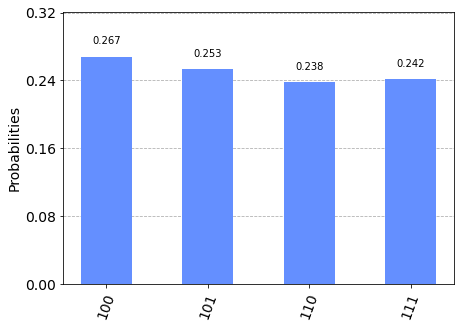

In [75]:
simulator = Aer.get_backend('qasm_simulator')
job1 = execute(c,simulator, shots = 1000)
result1 = job1.result()
counts1 = result1.get_counts(c)

plot_histogram(counts1)

# me salen los bits como q2,q1,q0

##### Codificación superdensa:

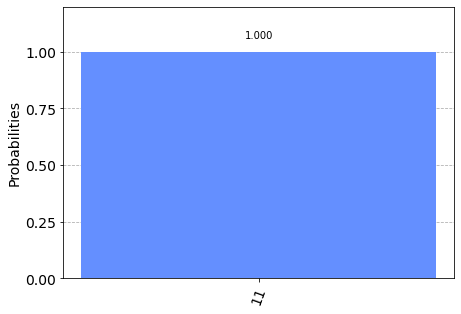

In [76]:
simulator = Aer.get_backend('qasm_simulator')
job2 = execute(c2,simulator, shots = 1000)
result2 = job2.result()
counts2 = result2.get_counts(c2)

plot_histogram(counts2)

#### Simulaciones con ruido

##### Teleportación:

In [82]:
backend2 = provider.get_backend('ibmq_athens')
noise_model = NoiseModel.from_backend(backend2)
coupling_map = backend2.configuration().coupling_map
basis_gates = noise_model.basis_gates

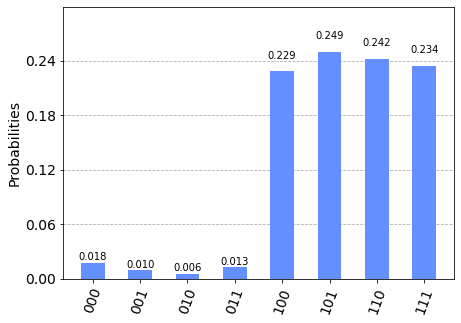

In [85]:
job3 = execute(c, simulator, coupling_map = coupling_map, basis_gates = basis_gates, noise_model = noise_model)
result3 = job3.result()
counts3 = result3.get_counts(c)

plot_histogram(counts3)

##### Codificación Superdensa

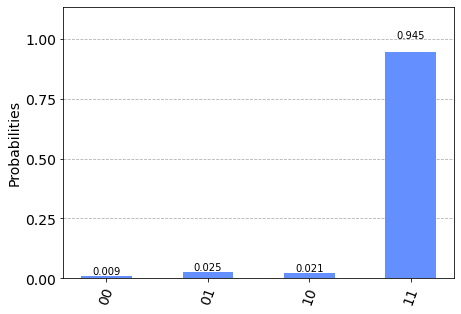

In [87]:
job4 = execute(c2, simulator, coupling_map = coupling_map, basis_gates = basis_gates, noise_model = noise_model)
result4 = job4.result()
counts4 = result4.get_counts(c2)

plot_histogram(counts4)

In [88]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

#### Ejecuciones en backends reales:



##### Teleportación:

In [91]:
backend3 = provider.backends.ibmq_lima
qobj_t = assemble(transpile(c, backend = backend3), backend = backend3)
job5 = backend3.run(qobj_t)

In [ ]:
retrieved_job = backend3.retrieve_job(job5.job_id())
res5 = retrieved_job.result()
counts5 = res5.get_counts()
print(counts5)
plot_histogram(counts5)

##### Codificación Superdensa:

In [ ]:
backend3 = provider.backends.ibmq_lima
qobj_c = assemble(transpile(c2, backend = backend3), backend = backend3)
job6 = backend3.run(qobj_c)

In [ ]:
retrieved_job2 = backend3.retrieve_job(job6.job_id())
res6 = retrieved_job2.result()
counts6 = res6.get_counts()
print(counts6)
plot_histogram(counts6)